Asiakaspalvelupisteen jonon muodostukseen vaikuttaa kaksi tekijää:

● Asiakkaiden saapuminen palvelupisteeseen.

● Palvelun kesto.

Asiakkaiden saapumista voidaan monissa tapauksissa mallintaa onnistuneesti eksponentiaalisella jakaumalla. Tällöin tarvitaan tieto siitä, kuinka paljon asiakkaita saapuu keskimäärin tarkasteltavassa aikavälissä.

Palvelun kestoa voidaan monissa tapauksissa mallintaa onnistuneesti normaalijakaumalla. Tällöin tarvitaan palveluajan keskiarvo ja keskihajonta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
KESKIARVO_ASIAKAS = 5 #asiakkaiden väli minuutteina
KESKIARVO_PALVELU = 2 #minuuttia
KESKIHAJONTA_PALVELU = 0.5
ASIAKKAITA = 1000

In [3]:
simulointi = pd.DataFrame(index = range(ASIAKKAITA))
simulointi['seuraava_asiakas'] = np.random.exponential(KESKIARVO_ASIAKAS, size = ASIAKKAITA)
simulointi['saapumis_aika'] = simulointi['seuraava_asiakas'].cumsum()
simulointi['palvelun_kesto'] = np.random.normal(loc = KESKIARVO_PALVELU, scale = KESKIHAJONTA_PALVELU,
                                               size = ASIAKKAITA)
simulointi['palvelun_aloitus'] = simulointi['saapumis_aika']
simulointi['palvelun_lopetus'] = simulointi['saapumis_aika'] + simulointi['palvelun_kesto']

for i in range(1, len(simulointi)):
    if simulointi.loc[i, 'saapumis_aika'] < simulointi.loc[i-1, 'palvelun_lopetus']:
        simulointi.loc[i, 'palvelun_aloitus'] = simulointi.loc[i-1,'palvelun_lopetus']
    simulointi['palvelun_lopetus'] = simulointi['palvelun_aloitus'] + simulointi['palvelun_kesto']
    
simulointi['jonotus'] = simulointi['palvelun_aloitus'] - simulointi['saapumis_aika']
simulointi['kokonais_aika'] = simulointi['jonotus'] + simulointi['palvelun_kesto']
simulointi

,seuraava_asiakas,saapumis_aika,palvelun_kesto,palvelun_aloitus,palvelun_lopetus,jonotus,kokonais_aika
0,4.559935,4.559935,1.970475,4.559935,6.530409,0.000000,1.970475
1,7.170075,11.730009,1.750567,11.730009,13.480576,0.000000,1.750567
2,2.125404,13.855414,2.863559,13.855414,16.718973,0.000000,2.863559
3,14.641087,28.496501,2.058293,28.496501,30.554794,0.000000,2.058293
4,3.523031,32.019532,2.096044,32.019532,34.115576,0.000000,2.096044
5,0.716269,32.735801,1.767038,34.115576,35.882613,1.379775,3.146812
6,5.303635,38.039436,1.753736,38.039436,39.793172,0.000000,1.753736
7,3.239577,41.279013,2.786673,41.279013,44.065686,0.000000,2.786673
8,12.890109,54.169123,2.685727,54.169123,56.854850,0.000000,2.685727
9,3.937489,58.106611,2.637670,58.106611,60.744281,0.000000,2.637670


In [4]:
simulointi[['jonotus', 'kokonais_aika']].describe()

,jonotus,kokonais_aika
count,1000.000000,1000.000000
mean,0.719808,2.700317
std,1.245056,1.332166
min,0.000000,0.668122
25%,0.000000,1.858800
50%,0.000000,2.314290
75%,1.122697,3.137720
max,10.021099,11.976497


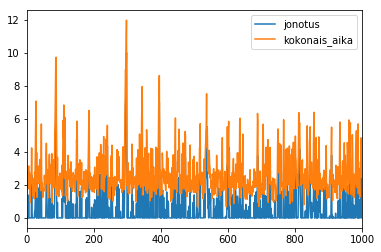

In [5]:
#Tästä näkee nousevana trendinä, jos jono kasvaa ajan kuluessa
simulointi[['jonotus', 'kokonais_aika']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4A57CD6A0>,
      dtype=object)

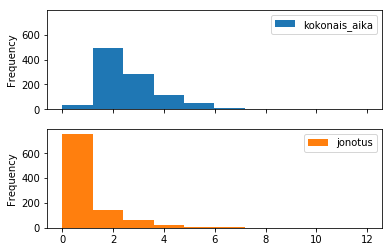

In [14]:
simulointi[['kokonais_aika', 'jonotus']].plot.hist(subplots=True, sharex=True, sharey=True)